3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [31]:
import pandas as pd
from sqlalchemy import create_engine

In [32]:
# MySQL database connection parameters
db_username = 'root'
db_password = 'anuj'
db_host = '127.0.0.1'
db_port = '3306'
db_name = 'phase_3'

# Create a MySQL database engine
engine = create_engine(f'mysql+pymysql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')


In [33]:

# SQL query to fetch the data
sql_query = """
SELECT
    `STATE/UT` AS State_UT,
    `YEAR` AS Year,
    `DISTRICT` AS District,
    CAST(`MURDER` AS UNSIGNED) AS Murders
FROM
    District_wise_crimes_committed_IPC_2001_2012
WHERE
    (`STATE/UT`, `YEAR`, CAST(`MURDER` AS UNSIGNED)) IN (
        SELECT `STATE/UT`, `YEAR`, MAX(CAST(`MURDER` AS UNSIGNED))
        FROM District_wise_crimes_committed_IPC_2001_2012
        GROUP BY `STATE/UT`, `YEAR`
    )
ORDER BY
    `STATE/UT`, `YEAR`;
"""

# Fetch data from MySQL and store in a DataFrame
df = pd.read_sql_query(sql_query, engine)
df


,State_UT,Year,District,Murders
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2001,TOTAL,13
2,A & N ISLANDS,2002,TOTAL,17
3,A & N ISLANDS,2003,TOTAL,21
4,A & N ISLANDS,2004,TOTAL,15
...,...,...,...,...
471,WEST BENGAL,2008,TOTAL,1811
472,WEST BENGAL,2009,TOTAL,2068
473,WEST BENGAL,2010,TOTAL,2398
474,WEST BENGAL,2011,TOTAL,2109


In [34]:
# Group by District and count the number of unique years
district_counts = df.groupby('District')['Year'].nunique()

# Filter districts that appear 3 or more years
districts_3_or_more_years = district_counts[district_counts >= 3].index.tolist()

# Filter the DataFrame to include only districts that appear 3 or more years
df_filtered = df[df['District'].isin(districts_3_or_more_years)]

# Sort the filtered DataFrame by State_UT, District, Murders, and Year in descending order
df_sorted = df_filtered.sort_values(by=['State_UT', 'District', 'Murders', 'Year'], ascending=[False, True, False, False])

# Print the sorted DataFrame
df_sorted

,State_UT,Year,District,Murders
473,WEST BENGAL,2010,TOTAL,2398
475,WEST BENGAL,2012,TOTAL,2252
474,WEST BENGAL,2011,TOTAL,2109
472,WEST BENGAL,2009,TOTAL,2068
471,WEST BENGAL,2008,TOTAL,1811
...,...,...,...,...
6,A & N ISLANDS,2005,TOTAL,14
1,A & N ISLANDS,2001,TOTAL,13
14,A & N ISLANDS,2010,TOTAL,9
11,A & N ISLANDS,2008,TOTAL,8


In [47]:
df.head(50)

,State_UT,Year,District,Murders
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2001,TOTAL,13
2,A & N ISLANDS,2002,TOTAL,17
3,A & N ISLANDS,2003,TOTAL,21
4,A & N ISLANDS,2004,TOTAL,15
5,A & N ISLANDS,2005,ANDAMAN,14
6,A & N ISLANDS,2005,TOTAL,14
7,A & N ISLANDS,2006,TOTAL,4
8,A & N ISLANDS,2007,A and N ISLANDS,15
9,A & N ISLANDS,2007,TOTAL,15


3.8.4 Using appropriate graphs to show your data (the result of 3.8.3).

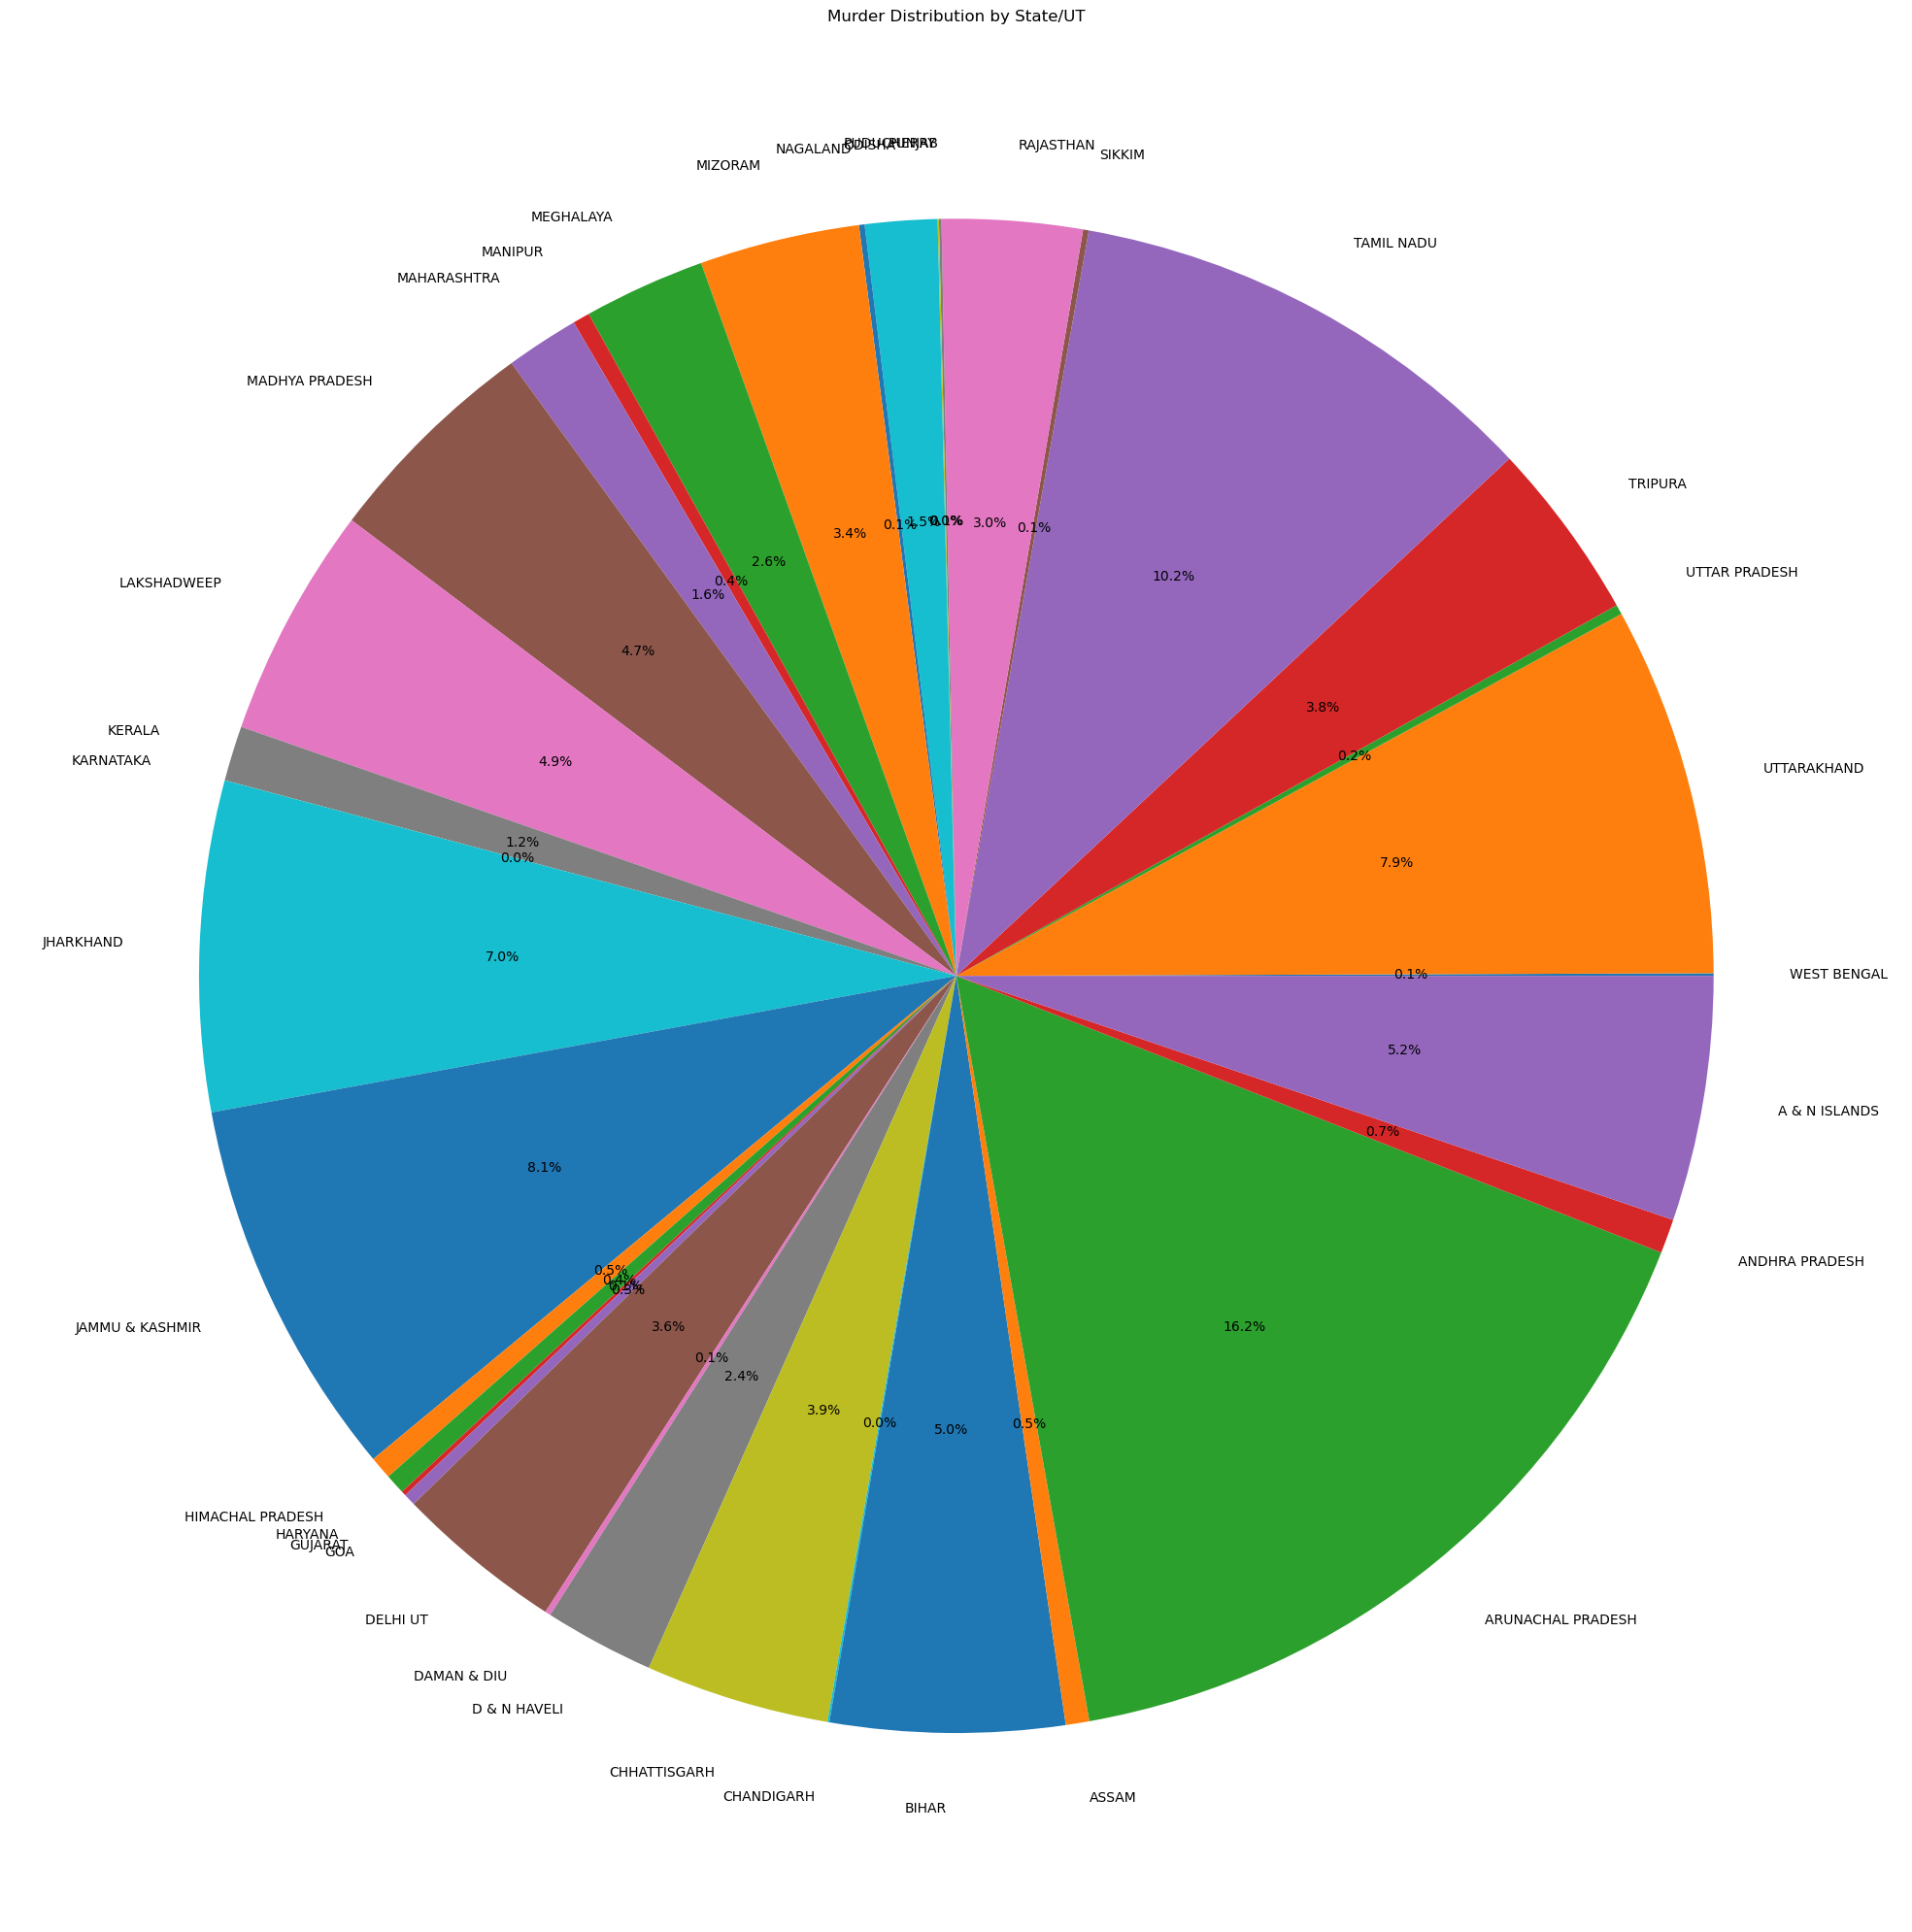

In [44]:
import matplotlib.pyplot as plt

# Using Pie Chart for Murder Distribution by State/UT
plt.figure(figsize=(20, 20))
plt.pie(df_sorted.groupby('State_UT')['Murders'].sum(), labels=df_sorted['State_UT'].unique(), autopct='%1.1f%%')
plt.title('Murder Distribution by State/UT')
plt.tight_layout()
plt.show()
